In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load and display the dataset
dataset = "/content/gdrive/MyDrive/Machine Learning (Integrify)/ML Projects/credit_customers.csv"
df = df = pd.read_csv(dataset)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
#Creating a subset of the original df and printing the Unique values of the categorized columns
focus_cols = df[['checking_status','credit_history', 'purpose', 'savings_status', 'housing', 'employment', 'installment_commitment', 'existing_credits', 'job', 'num_dependents', 'foreign_worker','class']]
for col in focus_cols:
    print(f'{col} uniques: {focus_cols[col].unique()}')

checking_status uniques: ['<0' '0<=X<200' 'no checking' '>=200']
credit_history uniques: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose uniques: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status uniques: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
housing uniques: ['own' 'for free' 'rent']
employment uniques: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
installment_commitment uniques: [4. 2. 3. 1.]
existing_credits uniques: [2. 1. 3. 4.]
job uniques: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
num_dependents uniques: [1. 2.]
foreign_worker uniques: ['yes' 'no']
class uniques: ['good' 'bad']


In [ ]:
df[['credit_amount', 'age']].describe()

,credit_amount,age
count,1000.000000,1000.000000
mean,3271.258000,35.546000
std,2822.736876,11.375469
min,250.000000,19.000000
25%,1365.500000,27.000000
50%,2319.500000,33.000000
75%,3972.250000,42.000000
max,18424.000000,75.000000


In [ ]:
#Converting some categorical data into numerical form.
df.checking_status = df.checking_status.map({"<0":1, "0<=X<200":2, "no checking":3, ">=200":4})
df.savings_status = df.savings_status.map({"no known savings":1, "<100":2, "500<=X<1000":3,  ">=1000":4, "100<=X<500":5})
df.employment = df.employment.map({">=7":1, "1<=X<4":2, "4<=X<7":3, "unemployed":4, "<1":5})

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,critical/other existing credit,radio/tv,1169.0,1,1,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,2,48.0,existing paid,radio/tv,5951.0,2,2,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,3,12.0,critical/other existing credit,education,2096.0,2,3,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,1,42.0,existing paid,furniture/equipment,7882.0,2,3,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,1,24.0,delayed previously,new car,4870.0,2,2,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,existing paid,furniture/equipment,1736.0,2,3,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,1,30.0,existing paid,used car,3857.0,2,2,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,3,12.0,existing paid,radio/tv,804.0,2,1,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,1,45.0,existing paid,radio/tv,1845.0,2,2,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
#Checking for dublplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicates))
duplicates.head()

Duplicate Rows :  0


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


<ipython-input-68-dd72862164a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')


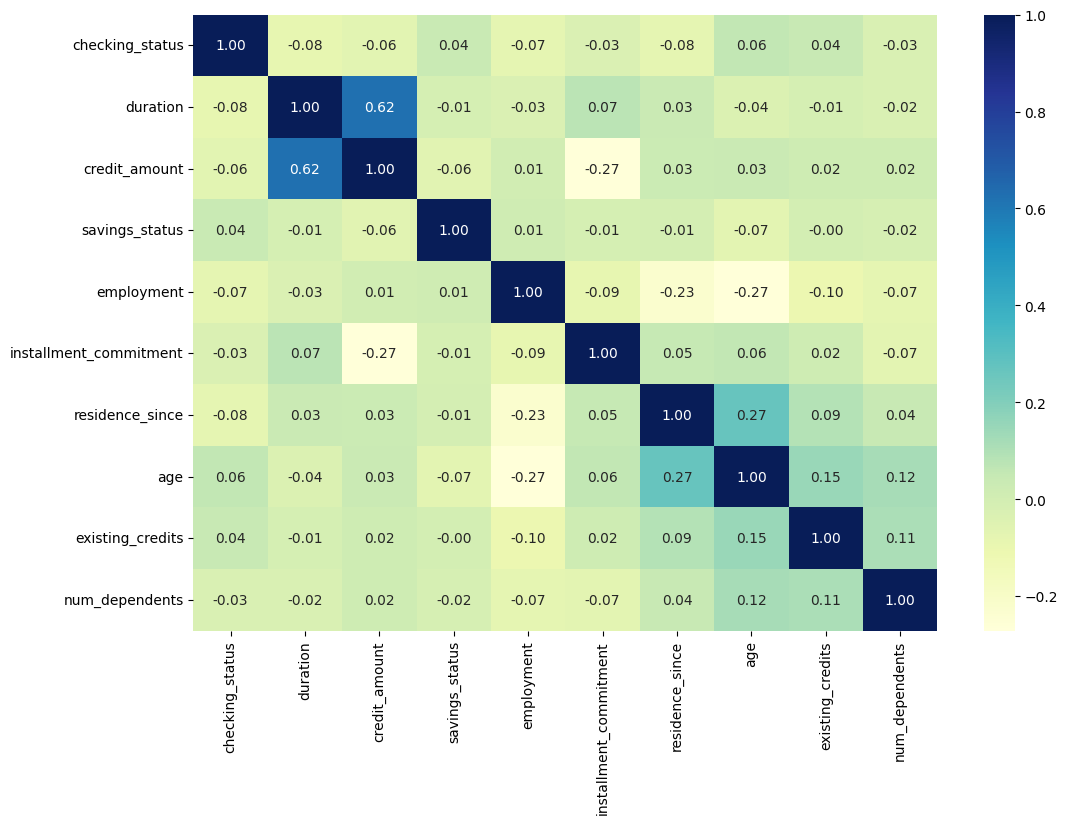

In [ ]:
#Correlation table
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

In [ ]:
#Verifying the data type in the dataframe
df.dtypes.value_counts()

object     11
float64     7
int64       3
dtype: int64

**Data Preprocessing**

In [ ]:
# Encoding categorical columns
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Setting up data for modeling
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data scaling with MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [ ]:
# Model training and evaluation function
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_mat)

# Models
models = [GaussianNB(), LogisticRegression(), RandomForestClassifier(n_estimators=50, random_state=42),
          AdaBoostClassifier(n_estimators=100, random_state=42), SVC(kernel='rbf'), DecisionTreeClassifier(), GradientBoostingClassifier()]


# Train and evaluate each model
for model in models:
    print(f"Training {model.__class__.__name__}...")
    # Choose the right scaled data based on the model
    if isinstance(model, MultinomialNB):
        train_evaluate_model(model, X_train_minmax, X_test_minmax, y_train, y_test)
    else:
        train_evaluate_model(model, X_train, X_test, y_train, y_test)
    print("-" * 30)

# SMOTE for balancing
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train and evaluate models on SMOTE data
print("Training models on SMOTE data...")
for model in models:
    print(f"Training {model.__class__.__name__}...")
    train_evaluate_model(model, X_train_sm, X_test_sm, y_train_sm, y_test_sm)
    print("-" * 30)

Training GaussianNB...
Accuracy: 0.77
Confusion Matrix:
[[ 33  26]
 [ 21 120]]
------------------------------
Training LogisticRegression...
Accuracy: 0.74
Confusion Matrix:
[[ 16  43]
 [  9 132]]
------------------------------
Training RandomForestClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78
Confusion Matrix:
[[ 27  32]
 [ 12 129]]
------------------------------
Training AdaBoostClassifier...
Accuracy: 0.77
Confusion Matrix:
[[ 28  31]
 [ 16 125]]
------------------------------
Training SVC...
Accuracy: 0.71
Confusion Matrix:
[[  3  56]
 [  1 140]]
------------------------------
Training DecisionTreeClassifier...
Accuracy: 0.69
Confusion Matrix:
[[ 29  30]
 [ 32 109]]
------------------------------
Training GradientBoostingClassifier...
Accuracy: 0.77
Confusion Matrix:
[[ 28  31]
 [ 15 126]]
------------------------------
Training models on SMOTE data...
Training GaussianNB...
Accuracy: 0.81
Confusion Matrix:
[[107  28]
 [ 26 119]]
------------------------------
Training LogisticRegression...
Accuracy: 0.79
Confusion Matrix:
[[106  29]
 [ 31 114]]
------------------------------
Training RandomForestClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.81
Confusion Matrix:
[[108  27]
 [ 25 120]]
------------------------------
Training AdaBoostClassifier...
Accuracy: 0.85
Confusion Matrix:
[[113  22]
 [ 21 124]]
------------------------------
Training SVC...
Accuracy: 0.58
Confusion Matrix:
[[ 44  91]
 [ 26 119]]
------------------------------
Training DecisionTreeClassifier...
Accuracy: 0.75
Confusion Matrix:
[[100  35]
 [ 36 109]]
------------------------------
Training GradientBoostingClassifier...
Accuracy: 0.81
Confusion Matrix:
[[106  29]
 [ 23 122]]
------------------------------


**Feature Importance**

In [ ]:
# Train and evaluate model function with feature importance
def train_evaluate_model(model, X_train, X_test, y_train, y_test, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_mat)

    # Plot feature importances if the model has this attribute
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]

        plt.figure(figsize=(20, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
        plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.title(f"{model.__class__.__name__} Feature Importance")
        plt.show()

In [ ]:
# Models
models = [DecisionTreeClassifier(max_depth=8, random_state=42),
          RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)]

In [ ]:
# Feature names
feature_names = df.drop(['class'], axis=1).columns.tolist()

Training DecisionTreeClassifier...
Accuracy: 0.74
Confusion Matrix:
[[ 37  22]
 [ 29 112]]


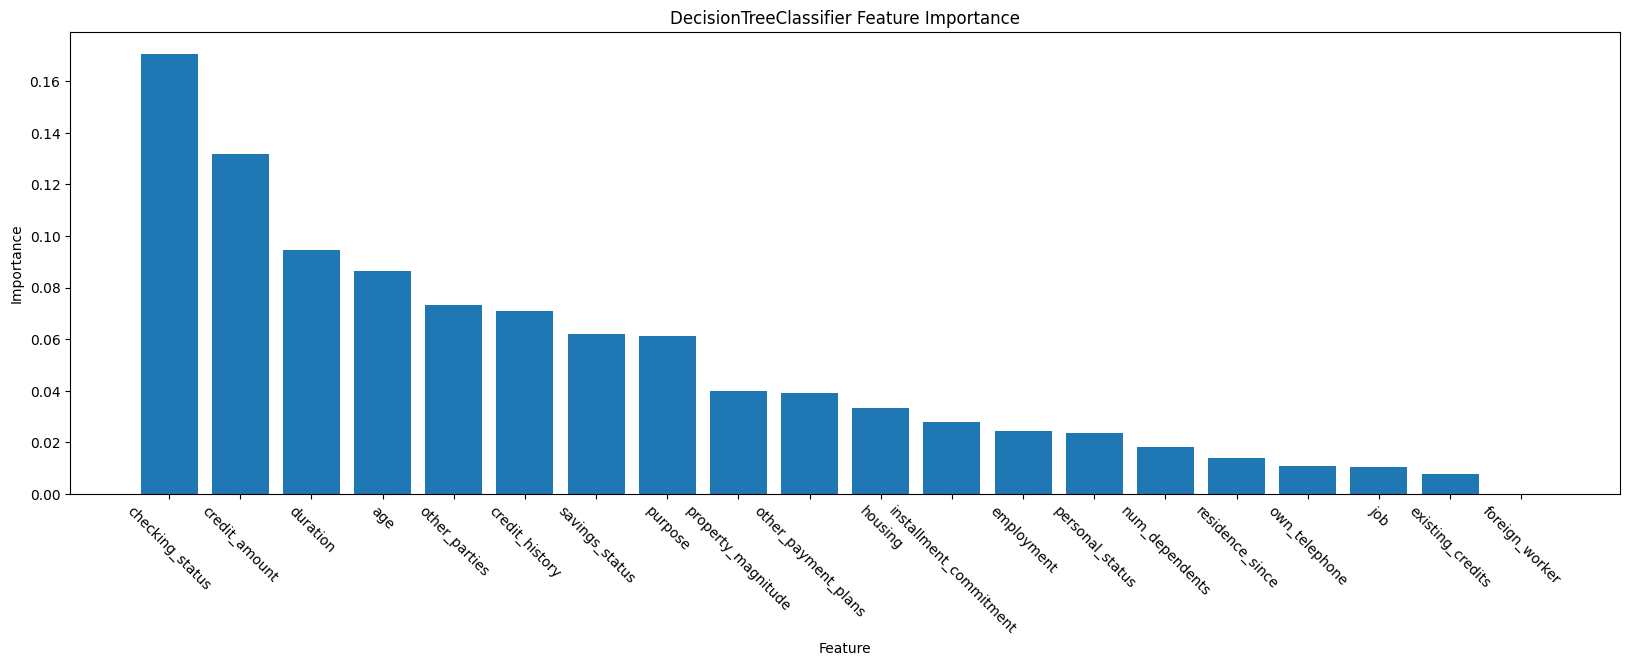

------------------------------
Training RandomForestClassifier...
Accuracy: 0.77
Confusion Matrix:
[[ 21  38]
 [  8 133]]


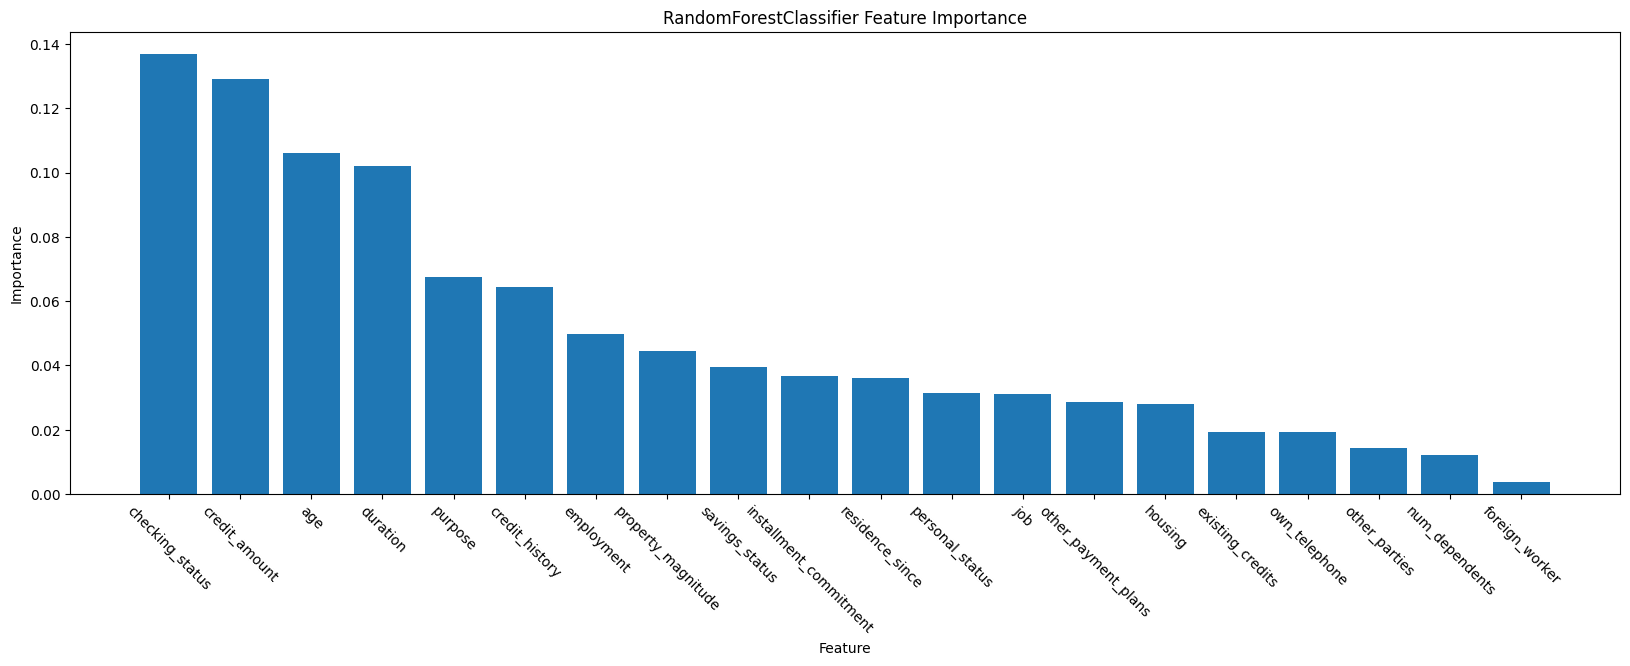

------------------------------


In [ ]:
# Train and evaluate each model
for model in models:
    print(f"Training {model.__class__.__name__}...")
    train_evaluate_model(model, X_train, X_test, y_train, y_test, feature_names)
    print("-" * 30)


[Text(0.6225, 0.9444444444444444, 'checking_status <= 2.5\ngini = 0.44\nsamples = 506\nvalue = [262, 538]\nclass = bad'),
 Text(0.43, 0.8333333333333334, 'property_magnitude <= 2.5\ngini = 0.5\nsamples = 274\nvalue = [218, 231]\nclass = bad'),
 Text(0.2733333333333333, 0.7222222222222222, 'personal_status <= 2.5\ngini = 0.499\nsamples = 209\nvalue = [178, 161]\nclass = good'),
 Text(0.16, 0.6111111111111112, 'age <= 20.5\ngini = 0.463\nsamples = 100\nvalue = [103, 59]\nclass = good'),
 Text(0.14666666666666667, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [10, 0]\nclass = good'),
 Text(0.17333333333333334, 0.5, 'credit_amount <= 8732.5\ngini = 0.475\nsamples = 96\nvalue = [93, 59]\nclass = good'),
 Text(0.10666666666666667, 0.3888888888888889, 'savings_status <= 4.5\ngini = 0.486\nsamples = 88\nvalue = [81, 58]\nclass = good'),
 Text(0.05333333333333334, 0.2777777777777778, 'age <= 23.5\ngini = 0.497\nsamples = 78\nvalue = [66, 56]\nclass = good'),
 Text(0.02666666666666667, 0.16666666666666

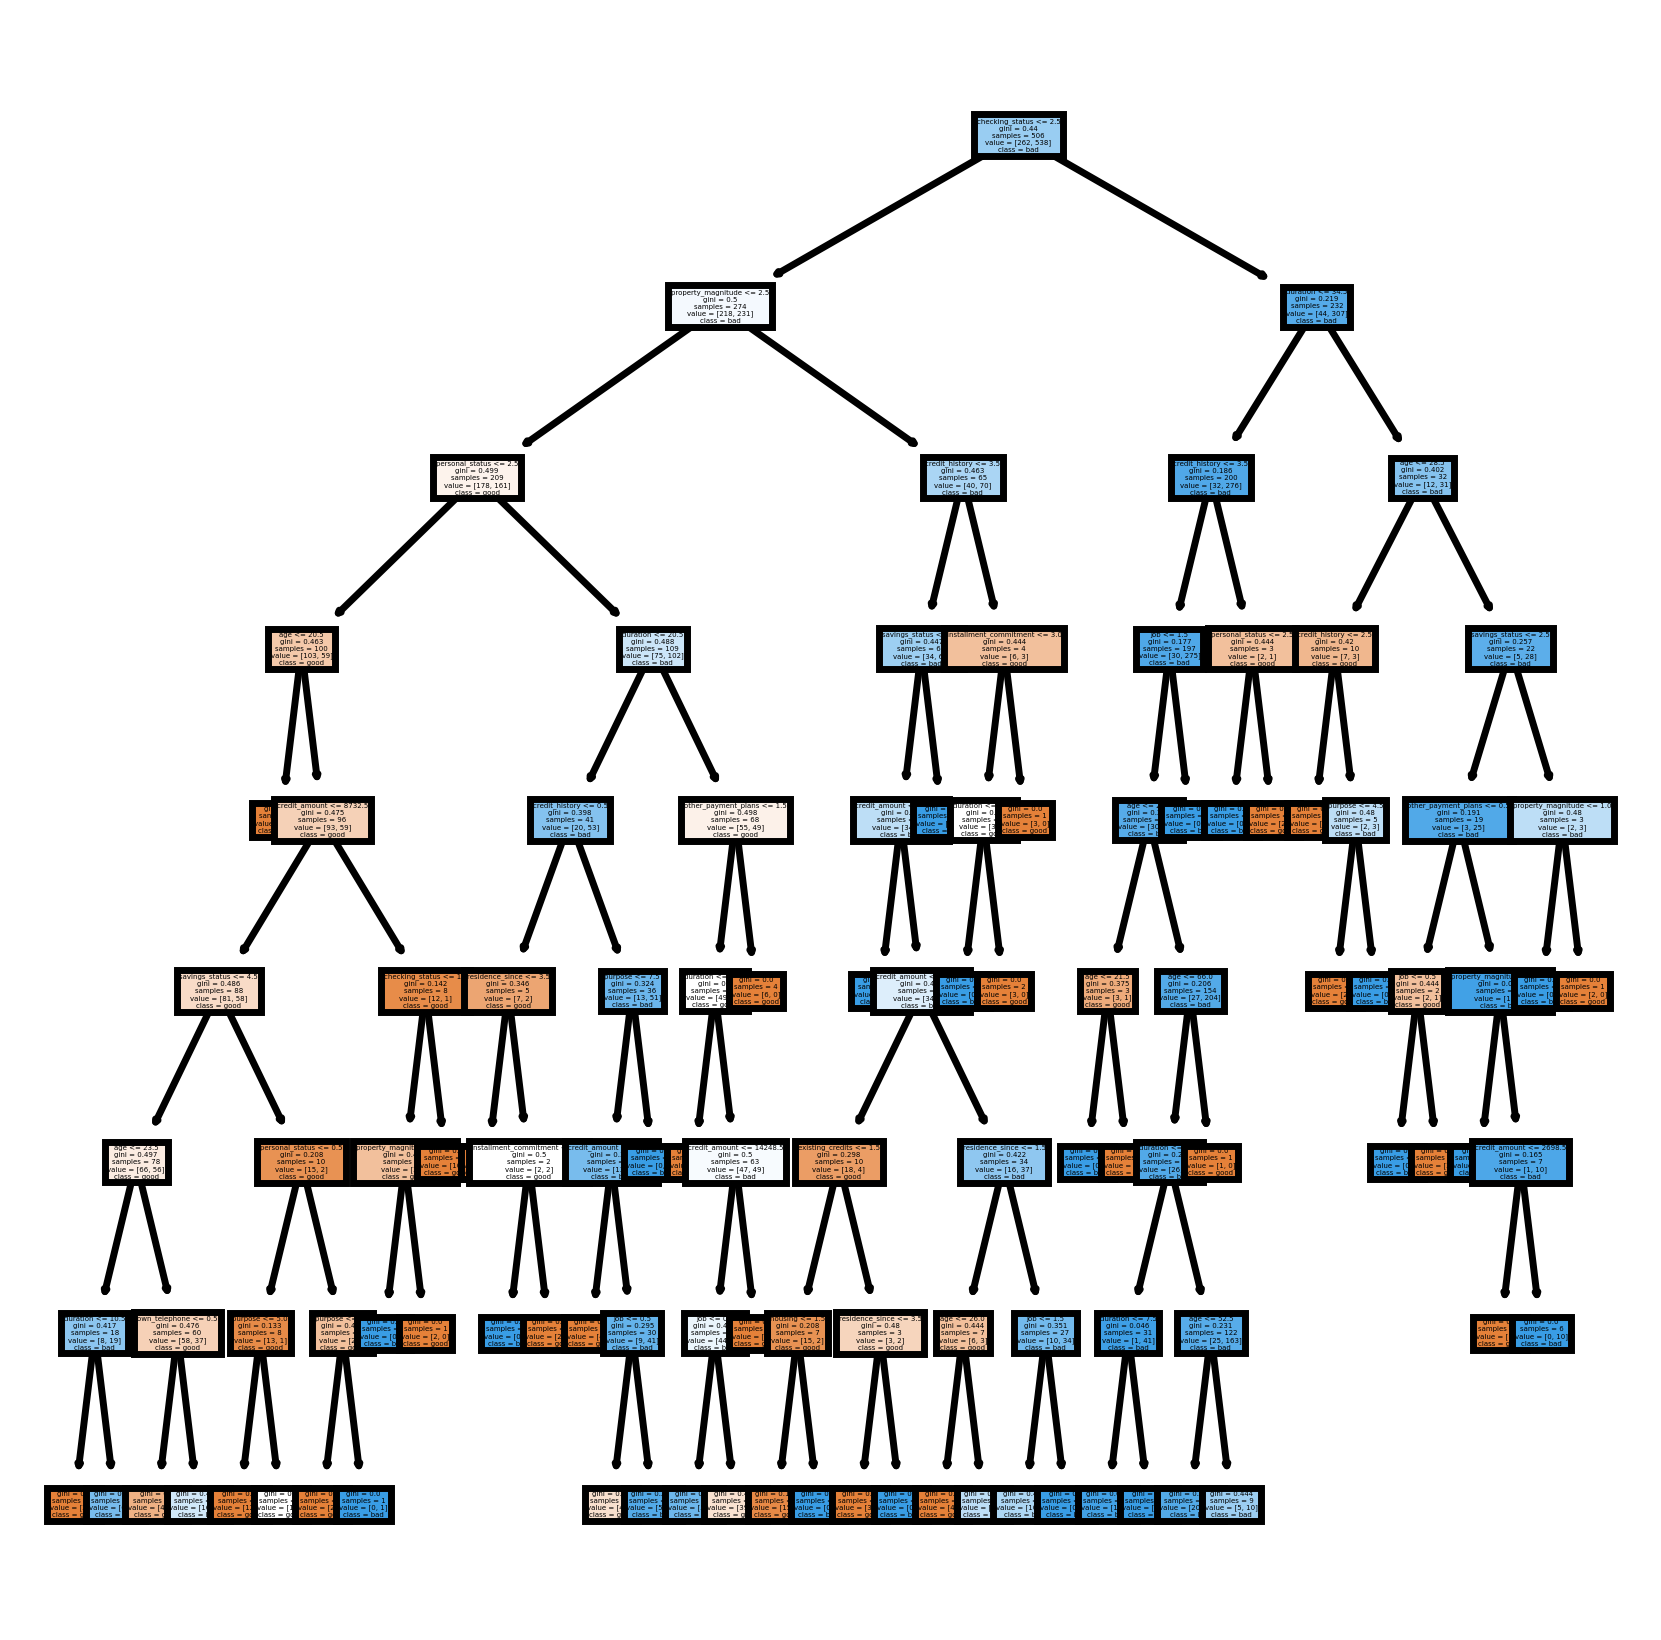

In [ ]:
# Decision Tree Visualization for Random Forest
from sklearn import tree

model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
model.fit(X_train, y_train)

fn = feature_names
cn = ['good', 'bad']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=500)
tree.plot_tree(model.estimators_[0], feature_names=fn, class_names=cn, filled=True)
# fig.savefig('model_individualtree.png')